In [78]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


In [79]:
!pip install lazypredict

In [80]:
from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import NuSVR, SVR
from sklearn.linear_model import (LassoLars, ElasticNet, Lasso,
                                  LassoLarsCV, LarsCV, LassoCV,
                                  ElasticNetCV, LassoLarsIC)
from sklearn.linear_model import (OrthogonalMatchingPursuitCV,
                                  OrthogonalMatchingPursuit,
                                  RANSACRegressor,
                                  SGDRegressor, HuberRegressor,
                                  PassiveAggressiveRegressor,
                                  LinearRegression, TweedieRegressor,
                                  BayesianRidge, ARDRegression,
                                  Ridge, RidgeCV)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import (AdaBoostRegressor,
                              GradientBoostingRegressor,
                              RandomForestRegressor,
                              ExtraTreesRegressor,
                              BaggingRegressor)
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
from sklearn.metrics import classification_report


In [81]:
import yfinance as yf
import pandas as pd
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    """
    Fetches stock data for the given ticker symbol within the specified time period.

    Parameters:
        ticker (str): Ticker symbol of the stock.
        start_date (str): Start date in the format 'YYYY-MM-DD'.
        end_date (str): End date in the format 'YYYY-MM-DD'.

    Returns:
        DataFrame: Stock data for the specified time period.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Specify the date range
start_date = '2000-01-01'  # Example start date
end_date = '2024-01-01'    # Example end date

# Fetch stock data for BMW within the specified time period


In [82]:
df= get_stock_data('VOLV-B.ST', start_date, end_date)

# Display the stock data
display(df)


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,45.00,45.00,43.30,43.50,17.81,33118100
2000-01-04,43.30,43.30,42.20,42.50,17.40,85792475
2000-01-05,8.50,8.50,8.50,42.50,17.40,0
2000-01-06,8.50,8.50,8.50,42.50,17.40,0
2000-01-07,42.80,43.20,42.30,42.70,17.48,95301925
...,...,...,...,...,...,...
2023-12-21,260.80,261.00,258.40,259.65,251.08,2007782
2023-12-22,259.30,261.15,259.10,259.75,251.17,1608410
2023-12-27,260.20,262.80,260.00,261.90,253.25,2151781


In [83]:


# Initialize the scaler
scaler_minmax = MinMaxScaler()

scaler = StandardScaler()

# Fit the scaler to your features and transform them

df['TomorrowClose'] = df['Close'].shift(-1)

# Create binary label
df['Target'] = (df['TomorrowClose'] > df['Close']).astype(int)

# Drop rows with NaN values (since there's no tomorrow's data for the last day)
df.dropna(inplace=True)

# Select features (X) and label (Y)
X = df[[ 'High', 'Volume','Adj Close' ]]
Y = df['Target']

X = df.drop(['Target', df.columns[0]], axis=1)
X = X.drop(['TomorrowClose', ], axis=1)



X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X)

,High,Low,Close,Adj Close,Volume
Date,,,,,
2000-01-03,45.00,43.30,43.50,17.81,33118100
2000-01-04,43.30,42.20,42.50,17.40,85792475
2000-01-05,8.50,8.50,42.50,17.40,0
2000-01-06,8.50,8.50,42.50,17.40,0
2000-01-07,43.20,42.30,42.70,17.48,95301925
...,...,...,...,...,...
2023-12-20,262.10,258.70,261.45,252.82,2920512
2023-12-21,261.00,258.40,259.65,251.08,2007782
2023-12-22,261.15,259.10,259.75,251.17,1608410


In [84]:
selected_features = {}
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)  # Adjust k as needed
X_train_univariate = selector.fit_transform(X_train_scaled, y_train)
selected_features['Univariate'] = X_train.columns[selector.get_support()]

# 2. Feature Importance from Trees
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
feature_importances = clf.feature_importances_
sfm = SelectFromModel(clf, threshold='median')
X_train_trees = sfm.fit_transform(X_train_scaled, y_train)
selected_features['Trees'] = X_train.columns[sfm.get_support()]

# 3. L1 Regularization (LASSO)
from sklearn.linear_model import LogisticRegression

l1_model = LogisticRegression(penalty='l1', solver='liblinear')
l1_model.fit(X_train_scaled, y_train)
sfm_l1 = SelectFromModel(l1_model)
X_train_l1 = sfm_l1.fit_transform(X_train_scaled, y_train)
selected_features['LASSO'] = X_train.columns[sfm_l1.get_support()]

# 4. Correlation Analysis
correlation_matrix = df.corr()
selected_features['Correlation'] = correlation_matrix.index[abs(correlation_matrix['Target']) > 0.1].values

# You can add more feature selection techniques here...

# Print selected features for each technique
for technique, features in selected_features.items():
    print(f"Selected features for {technique}:\n{features}")

# Optionally, you can store the selected features in separate variables or files for later use

Selected features for Univariate:

Index(['High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Selected features for Trees:

Index(['High', 'Adj Close', 'Volume'], dtype='object')

Selected features for LASSO:

Index(['Adj Close', 'Volume'], dtype='object')

Selected features for Correlation:

['Target']


In [85]:
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

# Making predictions on the test set
predictions = model.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.4737704918032787


In [86]:
def simple_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Defining a convolutional neural network (CNN) model
def cnn_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Reshape((X_train_scaled.shape[1], 1), input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'),
        tf.keras.layers.MaxPooling1D(pool_size=2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),

        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    return model

# Training and evaluating the simple feedforward neural network model
simple_nn = simple_model()
simple_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
simple_nn.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=1)
simple_nn_accuracy = simple_nn.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("Simple NN Accuracy:", simple_nn_accuracy)

# Training and evaluating the convolutional neural network (CNN) model
cnn = cnn_model()
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_scaled, y_train, epochs=30, batch_size=32, verbose=1)
cnn_accuracy = cnn.evaluate(X_test_scaled, y_test, verbose=0)[1]
print("CNN Accuracy:", cnn_accuracy)

Epoch 1/30

153/153 [==============================] - 7s 8ms/step - loss: 0.6930 - accuracy: 0.5151

Epoch 2/30

153/153 [==============================] - 1s 8ms/step - loss: 0.6923 - accuracy: 0.5147

Epoch 3/30

153/153 [==============================] - 2s 10ms/step - loss: 0.6919 - accuracy: 0.5200

Epoch 4/30

153/153 [==============================] - 1s 9ms/step - loss: 0.6920 - accuracy: 0.5147

Epoch 5/30

153/153 [==============================] - 1s 9ms/step - loss: 0.6917 - accuracy: 0.5198

Epoch 6/30

153/153 [==============================] - 1s 9ms/step - loss: 0.6917 - accuracy: 0.5149

Epoch 7/30

153/153 [==============================] - 2s 13ms/step - loss: 0.6909 - accuracy: 0.5186

Epoch 8/30

153/153 [==============================] - 1s 9ms/step - loss: 0.6913 - accuracy: 0.5202

Epoch 9/30

153/153 [==============================] - 1s 8ms/step - loss: 0.6909 - accuracy: 0.5208

Epoch 10/30

153/153 [==============================] - 1s 9ms/step - loss: 0.69

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam


from tensorflow.keras import layers, Sequential

# Assuming your input data has timesteps
timesteps = X_train_scaled.shape[1]  # Number of timesteps
features = X_train_scaled.shape[2] if len(X_train_scaled.shape) > 2 else 1  # Number of features per timestep
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(128, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(64, return_sequences=False)),
    layers.Dropout(0.2),
    layers.Dense(256),  # Output layer

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
#learning_rate = 0.00001
#optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
#, callbacks=[early_stopping]
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(Y_train_scaled, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/50

138/138 [==============================] - 59s 181ms/step - loss: 0.6943 - accuracy: 0.5158 - val_loss: 0.6926 - val_accuracy: 0.5184

Epoch 2/50

 89/138 [==================>...........] - ETA: 6s - loss: 0.6923 - accuracy: 0.5274

In [283]:
print(Y.value_counts())


0    3111

1    2986

Name: Target, dtype: int64


In [284]:
models = [
    NuSVC(), SVC(), LogisticRegression(), KNeighborsClassifier(),
    DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(),
    GradientBoostingClassifier(), GaussianNB(), DummyClassifier()
]
model_results_dict = {}

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted'+model_name: y_pred
    })
    # Add a column for model name
    # Concatenate the results with the main DataFrame
    model_results_dict[model_name] = model_results

# Reset index of the results DataFrame
for model_name, df in model_results_dict.items():
    print(f"Results for {model_name}:")
    display(df['Predicted'+model_name].value_counts())


Evaluating NuSVC...

Classification Report for NuSVC:

              precision    recall  f1-score   support



           0       0.40      0.01      0.01       576

           1       0.53      0.99      0.69       644



    accuracy                           0.53      1220

   macro avg       0.46      0.50      0.35      1220

weighted avg       0.47      0.53      0.37      1220





Evaluating SVC...

Classification Report for SVC:

              precision    recall  f1-score   support



           0       0.47      1.00      0.64       576

           1       0.00      0.00      0.00       644



    accuracy                           0.47      1220

   macro avg       0.24      0.50      0.32      1220

weighted avg       0.22      0.47      0.30      1220





Evaluating LogisticRegression...

Classification Report for LogisticRegression:

              precision    recall  f1-score   support



           0       0.47      1.00      0.64       576

           1       0.00  

1    1210
0      10
Name: PredictedNuSVC, dtype: int64

Results for SVC:


0    1220
Name: PredictedSVC, dtype: int64

Results for LogisticRegression:


0    1220
Name: PredictedLogisticRegression, dtype: int64

Results for KNeighborsClassifier:


0    655
1    565
Name: PredictedKNeighborsClassifier, dtype: int64

Results for DecisionTreeClassifier:


0    989
1    231
Name: PredictedDecisionTreeClassifier, dtype: int64

Results for RandomForestClassifier:


0    1031
1     189
Name: PredictedRandomForestClassifier, dtype: int64

Results for AdaBoostClassifier:


0    1091
1     129
Name: PredictedAdaBoostClassifier, dtype: int64

Results for GradientBoostingClassifier:


0    1117
1     103
Name: PredictedGradientBoostingClassifier, dtype: int64

Results for GaussianNB:


1    1220
Name: PredictedGaussianNB, dtype: int64

Results for DummyClassifier:


0    1220
Name: PredictedDummyClassifier, dtype: int64

In [285]:
concatenated_df = pd.concat(model_results_dict.values(), axis=1)

# Display the concatenated dataframe
display(concatenated_df)

,Actual,PredictedNuSVC,Actual,PredictedSVC,Actual,PredictedLogisticRegression,Actual,PredictedKNeighborsClassifier,Actual,PredictedDecisionTreeClassifier,Actual,PredictedRandomForestClassifier,Actual,PredictedAdaBoostClassifier,Actual,PredictedGradientBoostingClassifier,Actual,PredictedGaussianNB,Actual,PredictedDummyClassifier
0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,0
2,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0
3,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1216,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0
1217,1,1,1,0,1,0,1,1,1,0,1,0,1,0,1,0,1,1,1,0
1218,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [286]:
combined_df = pd.concat([X_test.reset_index(drop=True), concatenated_df], axis=1)

# Display the combined dataframe
display(combined_df)


,Open,High,Low,Close,Volume,Actual,PredictedNuSVC,Actual,PredictedSVC,Actual,...,Actual,PredictedRandomForestClassifier,Actual,PredictedAdaBoostClassifier,Actual,PredictedGradientBoostingClassifier,Actual,PredictedGaussianNB,Actual,PredictedDummyClassifier
0,134.20,138.45,134.20,138.25,6480006,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,138.80,139.30,136.80,137.65,5142394,1,1,1,0,1,...,1,1,1,1,1,0,1,1,1,0
2,138.00,139.40,137.75,138.50,3658953,0,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
3,139.50,139.80,137.80,138.50,3404845,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,138.15,139.10,137.45,138.30,3713231,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,260.15,262.10,258.70,261.45,2920512,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1216,260.80,261.00,258.40,259.65,2007782,1,1,1,0,1,...,1,0,1,0,1,0,1,1,1,0
1217,259.30,261.15,259.10,259.75,1608410,1,1,1,0,1,...,1,0,1,0,1,0,1,1,1,0
1218,260.20,262.80,260.00,261.90,2151781,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [287]:
combined_df['Sum_of_Ones'] = combined_df.filter(like='Predicted').sum(axis=1)

# Display the updated dataframe
display(combined_df)

       Open   High    Low  Close   Volume  Actual  PredictedNuSVC  Actual  \

0    134.20 138.45 134.20 138.25  6480006       0               1       0   

1    138.80 139.30 136.80 137.65  5142394       1               1       1   

2    138.00 139.40 137.75 138.50  3658953       0               1       0   

3    139.50 139.80 137.80 138.50  3404845       0               1       0   

4    138.15 139.10 137.45 138.30  3713231       0               1       0   

...     ...    ...    ...    ...      ...     ...             ...     ...   

1215 260.15 262.10 258.70 261.45  2920512       0               1       0   

1216 260.80 261.00 258.40 259.65  2007782       1               1       1   

1217 259.30 261.15 259.10 259.75  1608410       1               1       1   

1218 260.20 262.80 260.00 261.90  2151781       0               1       0   

1219 262.00 262.45 260.75 261.55  1740901       1               1       1   



      PredictedSVC  Actual  ...  PredictedRandomForestClassifi

In [329]:
combined_df=pd.read_csv('combined (4).csv')

In [330]:
combined_df

,Open,High,Low,Close,Volume,Actual,Sum_of_Ones,PredictedNuSVC,PredictedSVC,PredictedLogisticRegression,PredictedKNeighborsClassifier,PredictedDecisionTreeClassifier,PredictedRandomForestClassifier,PredictedAdaBoostClassifier,PredictedGradientBoostingClassifier,PredictedGaussianNB,PredictedDummyClassifier
0,134.20,138.45,134.20,138.25,6480006,0,4,1,0,0,1,0,1,0,0,1,0
1,138.80,139.30,136.80,137.65,5142394,1,6,1,0,0,1,1,1,1,0,1,0
2,138.00,139.40,137.75,138.50,3658953,0,6,1,0,0,1,1,1,0,1,1,0
3,139.50,139.80,137.80,138.50,3404845,0,5,1,0,0,1,1,1,0,0,1,0
4,138.15,139.10,137.45,138.30,3713231,0,5,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,260.15,262.10,258.70,261.45,2920512,0,2,1,0,0,0,0,0,0,0,1,0
1216,260.80,261.00,258.40,259.65,2007782,1,3,1,0,0,1,0,0,0,0,1,0
1217,259.30,261.15,259.10,259.75,1608410,1,3,1,0,0,1,0,0,0,0,1,0
1218,260.20,262.80,260.00,261.90,2151781,0,2,1,0,0,0,0,0,0,0,1,0


In [331]:
# Original list of columns
original_cols = ['Actual', 'Sum_of_Ones',
                 'PredictedNuSVC',  'PredictedSVC',
                 'PredictedLogisticRegression',  'PredictedKNeighborsClassifier',
                'PredictedDecisionTreeClassifier',  'PredictedRandomForestClassifier',
                 'PredictedAdaBoostClassifier',  'PredictedGradientBoostingClassifier',
                 'PredictedGaussianNB',  'PredictedDummyClassifier']


# Calculate correlation
correlation = combined_df.corr()

correlation

,Open,High,Low,Close,Volume,Actual,Sum_of_Ones,PredictedNuSVC,PredictedSVC,PredictedLogisticRegression,PredictedKNeighborsClassifier,PredictedDecisionTreeClassifier,PredictedRandomForestClassifier,PredictedAdaBoostClassifier,PredictedGradientBoostingClassifier,PredictedGaussianNB,PredictedDummyClassifier
Open,1.00,1.00,1.00,1.00,-0.35,-0.01,-0.48,0.12,NaN,NaN,0.02,-0.48,-0.49,-0.33,-0.30,NaN,NaN
High,1.00,1.00,1.00,1.00,-0.33,-0.01,-0.47,0.12,NaN,NaN,0.02,-0.48,-0.49,-0.33,-0.30,NaN,NaN
Low,1.00,1.00,1.00,1.00,-0.36,-0.01,-0.47,0.13,NaN,NaN,0.02,-0.48,-0.49,-0.33,-0.30,NaN,NaN
Close,1.00,1.00,1.00,1.00,-0.35,-0.01,-0.47,0.13,NaN,NaN,0.02,-0.48,-0.49,-0.33,-0.30,NaN,NaN
Volume,-0.35,-0.33,-0.36,-0.35,1.00,0.02,0.12,-0.46,NaN,NaN,0.01,0.14,0.18,0.10,0.08,NaN,NaN
Actual,-0.01,-0.01,-0.01,-0.01,0.02,1.00,0.00,-0.01,NaN,NaN,0.01,0.00,-0.01,0.02,-0.01,NaN,NaN
Sum_of_Ones,-0.48,-0.47,-0.47,-0.47,0.12,0.00,1.00,0.06,NaN,NaN,0.44,0.70,0.70,0.58,0.64,NaN,NaN
PredictedNuSVC,0.12,0.12,0.13,0.13,-0.46,-0.01,0.06,1.00,NaN,NaN,0.03,-0.03,-0.09,0.03,-0.04,NaN,NaN
PredictedSVC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PredictedLogisticRegression,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [313]:
for i in range(0, 8):
  count = len(combined_df[(combined_df['Actual'] == 1) & (combined_df['Sum_of_Ones'] > i)])

  print("Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than"+str(i), count)

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than0 644

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than1 642

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than2 393

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than3 137

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than4 72

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than5 32

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than6 8

Number of times 'Actual' is 1 and 'Sum_of_Ones' is greater than7 0


In [75]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier
from sklearn.svm import NuSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
import pandas as pd

# List of models to ensemble
models = [
    ('NuSVC', NuSVC()), ('SVC', SVC()), ('LogisticRegression', LogisticRegression()),
    ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier()),
    ('RandomForestClassifier', RandomForestClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier()), ('GaussianNB', GaussianNB()),
    ('DummyClassifier', DummyClassifier())
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame()

# Train and evaluate each model
for model_name, model in models:
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    print()
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    # Add a column for model name
    model_results['Model'] = model_name
    # Concatenate the results with the main DataFrame
    results_df = pd.concat([results_df, model_results])

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print("Results DataFrame:")
print(results_df)

# Ensemble models using hard voting
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train, y_train)

# Make predictions using the ensemble model
y_pred_ensemble = voting_clf.predict(X_test)

# Calculate classification report for the ensemble model
print("Classification Report for Ensemble Model:")
print(classification_report(y_test, y_pred_ensemble))


Evaluating NuSVC...

Classification Report for NuSVC:

              precision    recall  f1-score   support



           0       0.31      0.09      0.14       125

           1       0.56      0.85      0.67       168



    accuracy                           0.53       293

   macro avg       0.43      0.47      0.40       293

weighted avg       0.45      0.53      0.44       293





Evaluating SVC...

Classification Report for SVC:

              precision    recall  f1-score   support



           0       0.44      0.97      0.60       125

           1       0.75      0.07      0.13       168



    accuracy                           0.45       293

   macro avg       0.59      0.52      0.37       293

weighted avg       0.62      0.45      0.33       293





Evaluating LogisticRegression...

Classification Report for LogisticRegression:

              precision    recall  f1-score   support



           0       0.43      0.86      0.57       125

           1       0.60  

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, y_pred))

Classification Report for Random Forest Classifier:

              precision    recall  f1-score   support



           0       0.39      0.40      0.40       125

           1       0.55      0.54      0.54       168



    accuracy                           0.48       293

   macro avg       0.47      0.47      0.47       293

weighted avg       0.48      0.48      0.48       293




In [ ]:
models = [
    NuSVR(), LassoLars(), DummyRegressor(), ElasticNet(), Lasso(),
    LassoLarsCV(), LarsCV(), LassoCV(), ElasticNetCV(), LassoLarsIC(),
    OrthogonalMatchingPursuitCV(), OrthogonalMatchingPursuit(),
    PoissonRegressor(), TweedieRegressor(), BayesianRidge(), Ridge(),
    RidgeCV(), LinearRegression(),
     HuberRegressor(), SGDRegressor(), AdaBoostRegressor(),
    MLPRegressor(), GradientBoostingRegressor(), KNeighborsRegressor(),
    RandomForestRegressor(), ExtraTreesRegressor(), LGBMRegressor(),
    BaggingRegressor(), XGBRegressor(), SVR(),
    ExtraTreeRegressor(), RANSACRegressor(), DecisionTreeRegressor(),
    PassiveAggressiveRegressor(), GaussianProcessRegressor()
]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate and print the difference between predicted and actual values
    diff = y_test - y_pred
    print(f"Difference between predicted and actual values for {model_name}:")
    print(diff)
    print()

In [60]:
results_df = pd.DataFrame()

for model in models:
    model_name = model.__class__.__name__
    print(f"Evaluating {model_name}...")
    # Create a DataFrame to store the actual and predicted values
    model_results = pd.DataFrame({
        'Actual': y_test.values,
        'Predicted': y_pred
    })
    # Add a column for model name
    model_results['Model'] = model_name
    # Concatenate the results with the main DataFrame
    results_df = pd.concat([results_df, model_results])

# Reset index of the results DataFrame
results_df.reset_index(drop=True, inplace=True)

# Print the results DataFrame
print(results_df)

Evaluating NuSVR...

Evaluating LassoLars...

Evaluating DummyRegressor...

Evaluating ElasticNet...

Evaluating Lasso...

Evaluating LassoLarsCV...

Evaluating LarsCV...

Evaluating LassoCV...

Evaluating ElasticNetCV...

Evaluating LassoLarsIC...

Evaluating OrthogonalMatchingPursuitCV...

Evaluating OrthogonalMatchingPursuit...

Evaluating PoissonRegressor...

Evaluating TweedieRegressor...

Evaluating BayesianRidge...

Evaluating Ridge...

Evaluating RidgeCV...

Evaluating LinearRegression...

Evaluating HuberRegressor...

Evaluating SGDRegressor...

Evaluating AdaBoostRegressor...

Evaluating MLPRegressor...

Evaluating GradientBoostingRegressor...

Evaluating KNeighborsRegressor...

Evaluating RandomForestRegressor...

Evaluating ExtraTreesRegressor...

Evaluating LGBMRegressor...

Evaluating BaggingRegressor...

Evaluating XGBRegressor...

Evaluating SVR...

Evaluating ExtraTreeRegressor...

Evaluating RANSACRegressor...

Evaluating DecisionTreeRegressor...

Evaluating PassiveAg

In [50]:
# Calculate residuals for each model
residuals = {}
for model_name, preds in predictions.items():
    residuals[model_name] = preds - y_test

# Print or visualize residuals
for model_name, resid in residuals.items():
    print(f"Model: {model_name}")
    print("Residuals:")
    print(resid)
    print()

Model: Adjusted R-Squared

Residuals:

2022-10-24 00:00:00          NaN

2022-10-25 00:00:00          NaN

2022-10-26 00:00:00          NaN

2022-10-27 00:00:00          NaN

2022-10-28 00:00:00          NaN

                              ..

SGDRegressor                 NaN

SVR                          NaN

TransformedTargetRegressor   NaN

TweedieRegressor             NaN

XGBRegressor                 NaN

Length: 334, dtype: float64



Model: R-Squared

Residuals:

2022-10-24 00:00:00          NaN

2022-10-25 00:00:00          NaN

2022-10-26 00:00:00          NaN

2022-10-27 00:00:00          NaN

2022-10-28 00:00:00          NaN

                              ..

SGDRegressor                 NaN

SVR                          NaN

TransformedTargetRegressor   NaN

TweedieRegressor             NaN

XGBRegressor                 NaN

Length: 334, dtype: float64



Model: RMSE

Residuals:

2022-10-24 00:00:00          NaN

2022-10-25 00:00:00          NaN

2022-10-26 00:00:00         

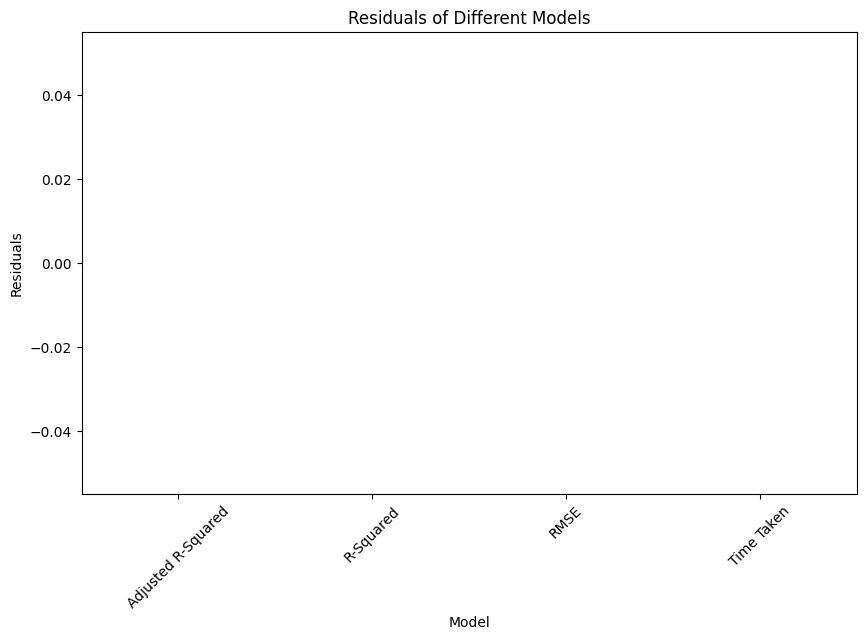

In [51]:
import matplotlib.pyplot as plt

# Plot residuals for each model
plt.figure(figsize=(10, 6))
plt.boxplot(residuals.values(), labels=residuals.keys())
plt.xlabel('Model')
plt.ylabel('Residuals')
plt.title('Residuals of Different Models')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Date'>

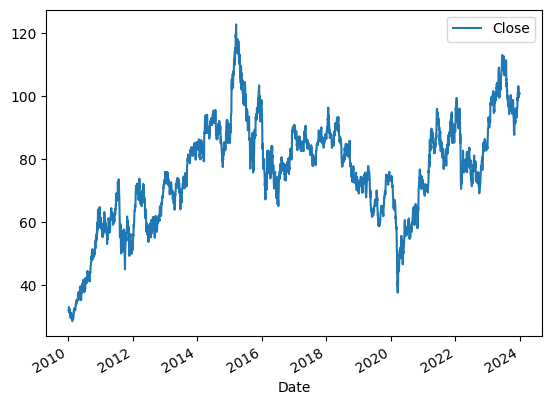

In [ ]:
df.plot.line(y='Close')

In [ ]:
df['Tomorrow'] = df['Close'].shift(-1)

In [ ]:
df['Target'] = (df['Tomorrow'] > df['Close']).astype(int)
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target
Date,,,,,,,,
2010-01-04,31.820000,32.455002,31.820000,32.049999,18.190943,1808170,32.310001,1
2010-01-05,31.959999,32.410000,31.785000,32.310001,18.338514,1564182,32.810001,1
2010-01-06,32.450001,33.040001,32.360001,32.810001,18.622301,2218604,33.099998,1
2010-01-07,32.650002,33.200001,32.380001,33.099998,18.786898,2026145,32.654999,0
2010-01-08,33.334999,33.430000,32.514999,32.654999,18.534327,1925894,32.169998,0
...,...,...,...,...,...,...,...,...
2023-12-21,98.980003,99.610001,98.139999,99.550003,99.550003,718117,100.639999,1
2023-12-22,99.629997,100.820000,99.559998,100.639999,100.639999,663585,100.400002,0
2023-12-27,100.580002,100.879997,100.099998,100.400002,100.400002,461826,100.440002,1


In [ ]:
train = df.iloc[:-100]
test = df.iloc[-100:]
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier (n_estimators=100, min_samples_split=100, random_state=1)
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
precision_score(test['Target'], preds)

0.40625

<Axes: xlabel='Date'>

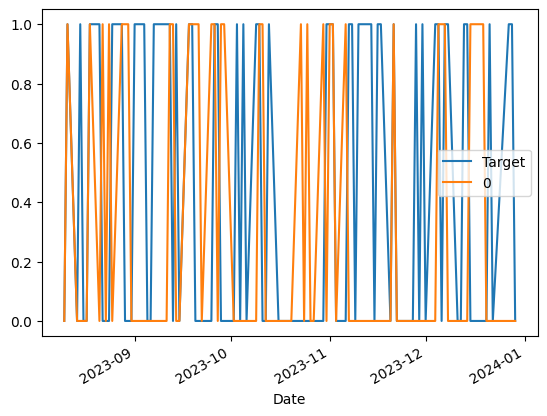

In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()

In [ ]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:

predictions = backtest(df, model, predictors)
predictions["Predictions"].value_counts()

0    597
1    460
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]


1    0.507096
0    0.492904
Name: Target, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = df.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    df[ratio_column] = df["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    df[trend_column] = df.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
df = df.dropna(subset=df.columns[df.columns != "Tomorrow"])
df

,Open,High,Low,Close,Adj Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2013-12-03,85.279999,85.459999,83.370003,83.519997,52.298500,1728503,82.540001,0,0.990571,1.0,0.987865,2.0,1.022191,30.0,1.132059,134.0,1.409021,528.0
2013-12-04,83.790001,83.790001,81.900002,82.540001,51.684849,1943799,81.580002,0,0.994099,0.0,0.981521,1.0,1.009497,29.0,1.117934,133.0,1.391309,527.0
2013-12-05,82.379997,82.489998,81.320000,81.580002,51.083717,1262632,82.139999,1,0.994151,0.0,0.977427,1.0,0.997435,28.0,1.104182,132.0,1.373997,526.0
2013-12-06,82.290001,82.629997,81.470001,82.139999,51.434387,1335002,82.110001,0,1.003420,1.0,0.989901,2.0,1.003752,29.0,1.110991,132.0,1.382287,526.0
2013-12-09,82.690002,82.889999,81.779999,82.110001,51.415592,964346,81.050003,0,0.999817,1.0,0.996747,1.0,1.002934,28.0,1.109893,131.0,1.380633,526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,98.980003,99.610001,98.139999,99.550003,99.550003,718117,100.639999,1,0.995649,0.0,0.985780,1.0,1.043149,24.0,0.999821,128.0,1.228219,510.0
2023-12-22,99.629997,100.820000,99.559998,100.639999,100.639999,663585,100.400002,0,1.005445,1.0,1.001373,1.0,1.053787,25.0,1.010167,128.0,1.241163,511.0
2023-12-27,100.580002,100.879997,100.099998,100.400002,100.400002,461826,100.440002,1,0.998806,1.0,1.000219,1.0,1.050499,25.0,1.007252,127.0,1.237690,511.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined
predictions = backtest(df, model, new_predictors)
predictions["Predictions"].value_counts()

0.0    51
1.0     6
Name: Predictions, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.16666666666666666

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]
predictions

,Target,Predictions
Date,,
2023-10-10,1,0.0
2023-10-11,0,0.0
2023-10-12,0,0.0
2023-10-13,1,0.0
2023-10-16,0,0.0
2023-10-17,0,0.0
2023-10-18,0,0.0
2023-10-19,0,0.0
2023-10-20,0,0.0


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, Sequential


In [ ]:
X_train = df.drop(["Tomorrow", "Target"], axis=1)  # Exclude the 'Tomorrow' column and 'Target' column from predictors
Y_train = df["Target"]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20)

# Assuming your input data has timesteps
timesteps = x_train.shape[1]  # Number of timesteps
features = x_train.shape[2] if len(x_train.shape) > 2 else 1  # Number of features per timestep

# Define the model architecture
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=False)),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

Epoch 1/100

58/58 [==============================] - 217s 3s/step - loss: 0.6981 - accuracy: 0.4935 - val_loss: 0.6971 - val_accuracy: 0.4927

Epoch 2/100

58/58 [==============================] - 195s 3s/step - loss: 0.6955 - accuracy: 0.4978 - val_loss: 0.6953 - val_accuracy: 0.4927

Epoch 3/100

58/58 [==============================] - 185s 3s/step - loss: 0.6955 - accuracy: 0.5038 - val_loss: 0.6950 - val_accuracy: 0.4927

Epoch 4/100

58/58 [==============================] - 172s 3s/step - loss: 0.6943 - accuracy: 0.4951 - val_loss: 0.6962 - val_accuracy: 0.4927

Epoch 5/100

58/58 [==============================] - 181s 3s/step - loss: 0.6949 - accuracy: 0.5060 - val_loss: 0.6968 - val_accuracy: 0.4927

Epoch 6/100

58/58 [==============================] - 178s 3s/step - loss: 0.6941 - accuracy: 0.4880 - val_loss: 0.6929 - val_accuracy: 0.5073

Epoch 7/100

58/58 [==============================] - 178s 3s/step - loss: 0.6929 - accuracy: 0.4989 - val_loss: 0.6963 - val_accuracy: 

In [ ]:

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

16/16 [==============================] - 11s 696ms/step - loss: 0.6928 - accuracy: 0.5059

Test Accuracy: 0.505859375


In [ ]:


#df = pd.read_csv('https://raw.githubusercontent.com/umar-farooq-khan/m-en-dataset/main/M-En%20Dataset.csv')
y = df['target'].replace('Normal', 0).replace('Anomaly', 1)
X = df.drop(['target', df.columns[0]], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.20)

from tensorflow.keras import layers, Sequential

# Assuming your input data has timesteps
timesteps = x_train.shape[1]  # Number of timesteps
features = x_train.shape[2] if len(x_train.shape) > 2 else 1  # Number of features per timestep
model = Sequential([
    layers.Input(shape=(timesteps, features)),  # Input shape with timesteps and features

    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),  # Add Dropout to prevent overfitting
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.LSTM(400, return_sequences=True)),
    layers.Dropout(0.2),
    layers.Bidirectional(layers.GRU(400, return_sequences=False)),
    layers.Dropout(0.2),

    layers.Dense(1, activation='sigmoid')  # Output layer
])

# Define optimizer and compile the model
learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with Early Stopping
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

KeyError: 'target'